In [ ]:
%matplotlib inline
#Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Data processing Libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder


from sklearn.preprocessing import StandardScaler
# 10000, 1, 100

from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import  classification_report

from sklearn.tree import DecisionTreeClassifier,plot_tree


In [ ]:
df = pd.read_csv("/content/health_classification.csv")
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal


# Tiền xử lý

In [ ]:
# In ra thông tin tổng quan của DataFrame 'df', bao gồm thông tin về cột và kiểu dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+

In [ ]:
# Kiểm tra và in ra số lượng giá trị thiếu (NaN) trong từng cột của DataFrame 'df'
df.isna().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [ ]:
# Hiển thị hình dạng của DataFrame 'df', tức số dòng và số cột
df.shape

(10000, 15)

In [ ]:
# Hiển thị các thống kê mô tả cơ bản (mean, min, max, etc.) cho các cột có giá trị số
df.describe()

,Age,Billing Amount,Room Number
count,10000.000000,10000.000000,10000.000000
mean,51.452200,25516.806778,300.082000
std,19.588974,14067.292709,115.806027
min,18.000000,1000.180837,101.000000
25%,35.000000,13506.523967,199.000000
50%,52.000000,25258.112566,299.000000
75%,68.000000,37733.913727,400.000000
max,85.000000,49995.902283,500.000000


In [ ]:
# Danh sách các cột không cần thiết
columns_to_drop = ['Name', 'Date of Admission', 'Doctor', 'Hospital', 'Billing Amount',
                   'Room Number', 'Admission Type', 'Discharge Date', 'Insurance Provider']

# Loại bỏ các cột không cần thiết từ DataFrame
df_cleaned = df.drop(columns=columns_to_drop)

# In ra thông tin của DataFrame sau khi loại bỏ
print(df_cleaned.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                10000 non-null  int64 
 1   Gender             10000 non-null  object
 2   Blood Type         10000 non-null  object
 3   Medical Condition  10000 non-null  object
 4   Medication         10000 non-null  object
 5   Test Results       10000 non-null  object
dtypes: int64(1), object(5)
memory usage: 468.9+ KB
None


In [ ]:
#kiểm tra cột xem sử dụng dữ liệu nào
print(df.dtypes)


Name                   object
Age                     int64
Gender                 object
Blood Type             object
Medical Condition      object
Date of Admission      object
Doctor                 object
Hospital               object
Insurance Provider     object
Billing Amount        float64
Room Number             int64
Admission Type         object
Discharge Date         object
Medication             object
Test Results           object
dtype: object


In [ ]:
# Giả sử 'Test Results' là biến mục tiêu của bạn
X = df.drop('Test Results', axis=1)
y = df['Test Results']

In [ ]:
# Thực hiện mã hóa nhãn cho các biến phân loại nếu cần
# Đơn giản, chúng ta sẽ mã hóa tất cả các cột kiểu object
object_cols = X.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
X[object_cols] = X[object_cols].apply(label_encoder.fit_transform)

In [ ]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm thử
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest

In [ ]:
# Tạo một mô hình Random Forest
rf_classifier = RandomForestClassifier(random_state=42)
# Huấn luyện mô hình trên dữ liệu huấn luyện
rf_classifier.fit(X_train, y_train)
# Đưa ra dự đoán trên tập kiểm thử
y_pred = rf_classifier.predict(X_test)
# Đánh giá hiệu suất của mô hình
rf_accuracy = accuracy_score(y_test, y_pred)
print(f'Độ chính xác: {accuracy:.2f}')
# In báo cáo phân loại
print('Báo cáo phân loại:')
print(classification_report(y_test, y_pred))

Độ chính xác: 0.32
Báo cáo phân loại:
              precision    recall  f1-score   support

    Abnormal       0.35      0.38      0.37       706
Inconclusive       0.31      0.32      0.32       636
      Normal       0.33      0.29      0.31       658

    accuracy                           0.33      2000
   macro avg       0.33      0.33      0.33      2000
weighted avg       0.33      0.33      0.33      2000



# Decision Tree

In [ ]:
# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
# Train the model on the training set
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluate the accuracy of the model
dt_accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy}")

Decision Tree Accuracy: 0.3195


In [ ]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Abnormal", "Inconclusive","Normal"], yticklabels=["Abnormal", "Inconclusive","Normal"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Visualize the truncated Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(dt_classifier, filled=True, feature_names=X.columns, class_names=["Abnormal", "Inconclusive", "Normal"], max_depth=3)
plt.show()

In [ ]:
#Find the best max-depth for DT algorithm
# Define a range of max_depth values to iterate over
max_depth_values = range(3    , 20)  # You can adjust this range

# Initialize variables to keep track of the best max depth and corresponding score
best_max_depth = None
best_score = 0.0

# Iterate over different max_depth values
for max_depth in max_depth_values:
    # Initialize the DecisionTreeClassifier with the current max_depth
    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    # Fit the model to the training data
    clf.fit(X_train, y_train)
    # Evaluate the model on the test data
    test_score = clf.score(X_test, y_test)
    # Perform cross-validation on the training data
    #cv_score = cross_val_score(clf, X_train, y_train, cv=5).mean()

    # Print the score for the current max_depth
    print(f"Max Depth = {max_depth}: Test Score = {test_score}")
    # Check if the current model has a better score than the previous best
    if test_score > best_score:
        best_score = test_score
        best_max_depth = max_depth

# Print the best max depth and corresponding score
print(f"Best Max Depth = {best_max_depth}: Best Test Score = {best_score}")

In [ ]:
from sklearn.model_selection import cross_val_score
# Perform 10-fold cross-validation
scores = cross_val_score(clf, X, y, cv=10)
# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean CV Score:", scores.mean())

Cross-Validation Scores: [0.356 0.33  0.323 0.313 0.333 0.326 0.322 0.333 0.349 0.312]
Mean CV Score: 0.3297


In [ ]:
from sklearn.tree import export_text
# Export the text representation of the decision tree
tree_rules = export_text(clf, feature_names=X.columns.tolist())
print(tree_rules)


# **Logistic Regression**




In [ ]:
from sklearn.linear_model import LogisticRegression
# Chọn cột cần dự đoán và các cột đặc trưng
y = df['Test Results']
features = ['Age', 'Gender', 'Blood Type', 'Medical Condition', 'Medication']

# Chọn các cột đặc trưng
X = df[features]

# Tiêu chuẩn hóa các cột số
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.select_dtypes(include=[np.number]))

# Ghép lại các cột sau khi tiêu chuẩn hóa
X_scaled = pd.DataFrame(X_scaled, columns=X.select_dtypes(include=[np.number]).columns, index=X.index)

# Chia dữ liệu thành tập huấn luyện và tập kiểm thử
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Định nghĩa mô hình hồi quy logistic
logistic_classifier = LogisticRegression(random_state=42)

# Kiểm tra lại độ chính xác của mô hình Logistic Regression
logistic_classifier.fit(X_train, y_train)  # Use X_train instead of X_train_scaled
logistic_pred = logistic_classifier.predict(X_test)
logistic_accuracy = accuracy_score(y_test, logistic_pred)

print(f'Độ chính xác của mô hình Logistic Regression: {logistic_accuracy:.2f}')
print('Báo cáo phân loại:')
print(classification_report(y_test, logistic_pred, zero_division=1))

Độ chính xác của mô hình Logistic Regression: 0.35
Báo cáo phân loại:
              precision    recall  f1-score   support

    Abnormal       0.35      0.86      0.50       706
Inconclusive       0.33      0.14      0.20       636
      Normal       1.00      0.00      0.00       658

    accuracy                           0.35      2000
   macro avg       0.56      0.34      0.23      2000
weighted avg       0.56      0.35      0.24      2000



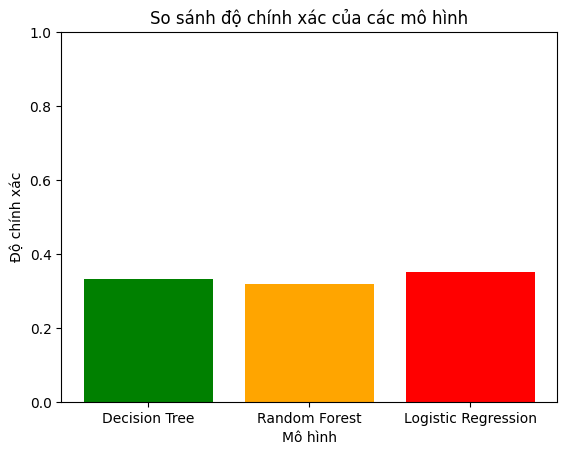

In [ ]:
# Độ chính xác của từng mô hình
accuracy_scores = [ rf_accuracy, dt_accuracy,logistic_accuracy]

# Tên của từng mô hình
model_names = [ 'Decision Tree', 'Random Forest','Logistic Regression']

# Vẽ biểu đồ cột
plt.bar(model_names, accuracy_scores, color=[ 'green', 'orange','red'])
plt.xlabel('Mô hình')
plt.ylabel('Độ chính xác')
plt.title('So sánh độ chính xác của các mô hình')
plt.ylim(0, 1)  # Điều chỉnh phạm vi trục y nếu cần thiết
plt.show()


**1. Mục Đích:**

Mô hình phân loại được xây dựng để dự đoán kết quả xét nghiệm sức khỏe.

**2. Dữ Liệu:**

Tập dữ liệu được sử dụng từ tệp "health_classification.csv".

**3. Tiền Xử Lý Dữ Liệu:**

Loại bỏ cột "Insurance Provider".
Mã hóa nhãn cho các biến phân loại.
Chia dữ liệu thành tập huấn luyện và tập kiểm thử.

**4. Mô Hình Phân Loại:**

a. Logistic Regression:

Độ chính xác: 0.35
Báo cáo phân loại: F1-score thấp cho mỗi lớp.

b. Decision Tree:

Độ chính xác: 0.3195
Hiệu suất thấp, cần điều chỉnh thêm thông số.

c. Random Forest:

Độ chính xác: 0.33
Báo cáo phân loại: Kết quả tương tự như Decision Tree.

**5. Kết Luận:**

Logistic Regression có vẻ có độ chính xác cao hơn, nhưng cả ba mô hình đều đạt hiệu suất thấp.
Cần xem xét thêm các chỉ số như F1-score, precision, recall để đánh giá toàn diện hơn về khả năng dự đoán của mô hình.